# 🏙️ California Housing Prices

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

## Data Processing

In [2]:
csv_path = os.path.join(os.getcwd(), "dataset", "housing.csv")  # Path to the csv file
df = pd.read_csv(csv_path)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df["ocean_proximity"].value_counts()    # Count the number of each category in the column "ocean_proximity".

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

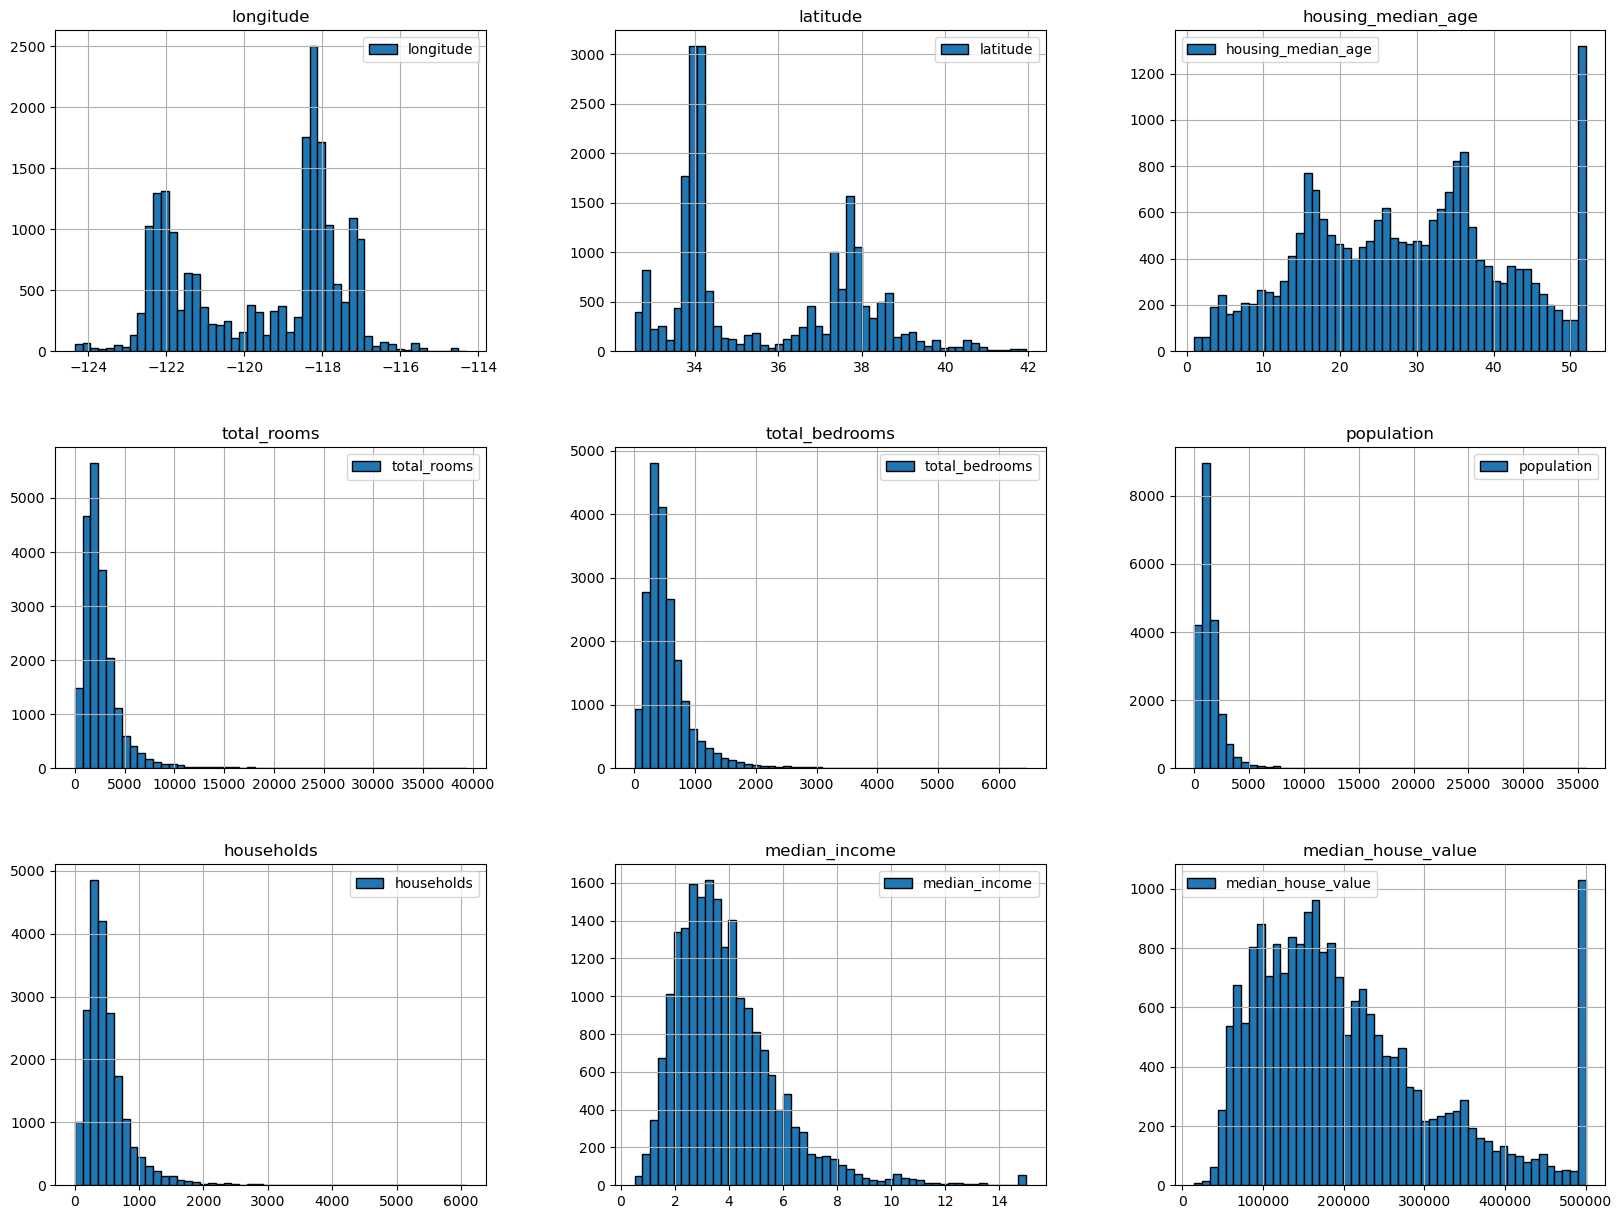

In [6]:
# Histograms

df.hist(
    bins = 50,
    figsize = (20, 15),
    legend = True,
    edgecolor = "black",
    );

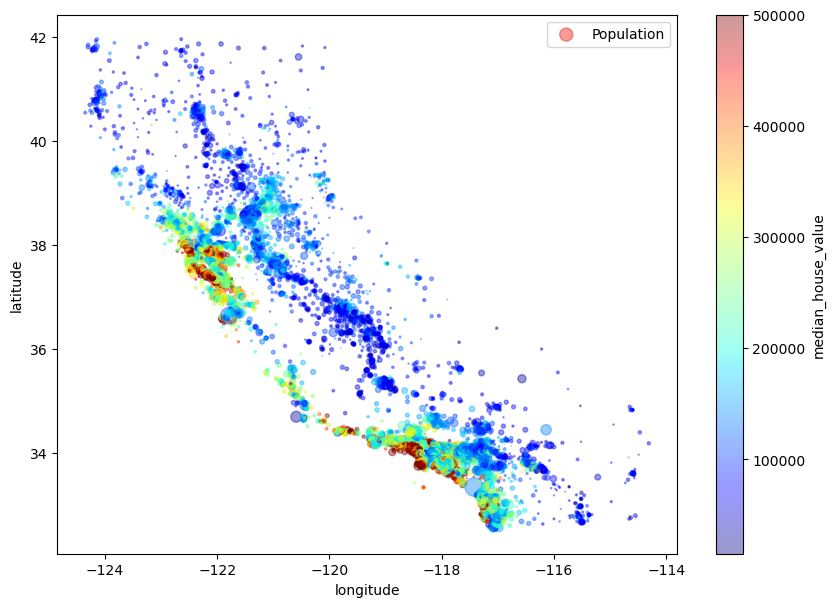

In [7]:
# Plotting the dataset to see the distribution of the data

df.plot(
    kind = 'scatter', 
    x = 'longitude',
    y = 'latitude',
    alpha = 0.4,
    s = df['population']/200,   # Size of the circle indicators
    label = 'Population',
    figsize = (10,7),
    c = 'median_house_value',   # Color of the circle indicators
    cmap = plt.get_cmap('jet'),  # type: ignore    
    colorbar = True,
    );

## Creating Train & Test Sets

In [8]:
# Creating a Test Set

def split_train_test(data, test_ratio):
    np.random.seed(42)    # To get the same shuffled indices every time
    shuffled_indices = np.random.permutation(len(data))    # Shuffling the indices
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]     # First 20% of the shuffled indices
    train_indices = shuffled_indices[test_set_size:]        # Last 80% of the shuffled indices
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(df, 0.2) # 20% of the data is the "test" set
percentages = (len(train_set)/len(df), len(test_set)/len(df))

print(f">> Train Set Size: {len(train_set)} ({percentages[0]*100}%)\n>> Test Set Size: {len(test_set)} ({percentages[1]*100}%)")

>> Train Set Size: 16512 (80.0%)
>> Test Set Size: 4128 (20.0%)


### Hashing the unique identifier for every instance to create a test set

In [10]:
from zlib import crc32      # To generate a unique identifier for each row

def test_set_check(identifier, test_ratio): 
    
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32    # type: ignore 
    # Returns "True" if the identifier is in the test set.

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]       # Extracting the unique identifier column
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))        # Applying the "test_set_check()" function to the unique identifier column to get a boolean array.
    
    return data.loc[~in_test_set], data.loc[in_test_set]    
    # The ~ flips 1s to 0s and 0s to 1s.

#### "crc32" is a hash function that generates a unique identifier for each value given.

In [11]:
df_with_id = df.reset_index()      # Adds an "index" column  
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")     # Using the "index" column as the unique identifier column.

#### It's better to use sci-kit learn's **train_test_split( )** function to split the data into train and test sets.

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)  # 20% of the data is the "test" set with a random state of 42.

percentages = (len(train_set)/len(df), len(test_set)/len(df))
print(f">> Train Set Size: {len(train_set)} ({percentages[0]*100}%)\n>> Test Set Size: {len(test_set)} ({percentages[1]*100}%)")

>> Train Set Size: 16512 (80.0%)
>> Test Set Size: 4128 (20.0%)


#### To be able to guarantee that the test and train sets are representative of the dataset "stratified sampling" is used.

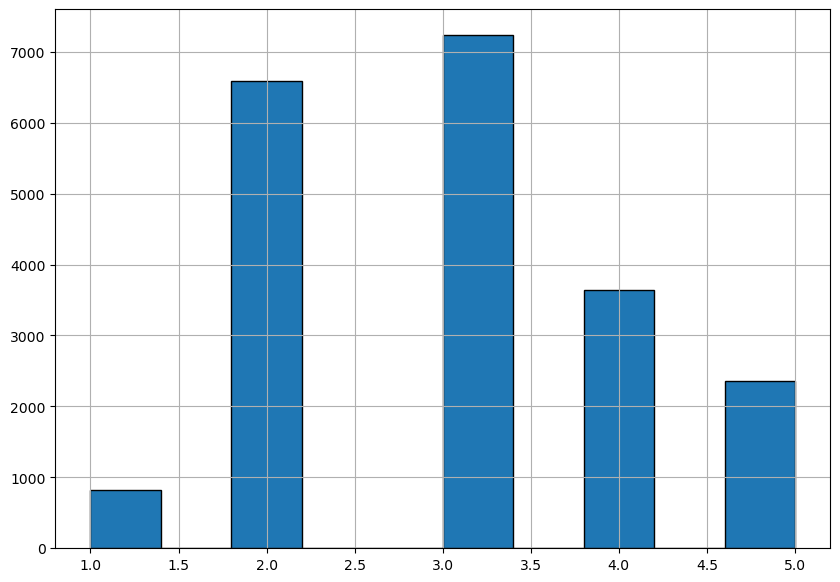

In [13]:
# Creating a new column "income_cat" with 5 categories.
df["income_cat"] = pd.cut(df["median_income"], bins = [0, 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])

df["income_cat"].hist(
    edgecolor = "black",
    figsize = (10, 7)
);

In [14]:
# Stratified Sampling based on the "income_cat" column
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# Percentage of each category in the "income_cat" column of the test set.

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

#### Discarding the changes made in the data

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

### Visualizing the Test Set

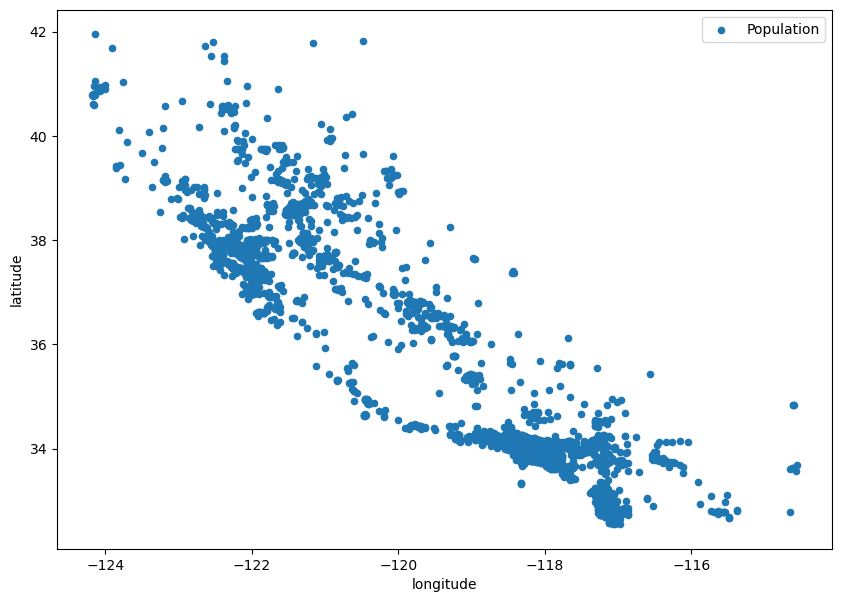

In [18]:
# Visualizing the test set to see the distribution of the data
df_test = strat_test_set.copy()
df_test.plot(
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    label = 'Population',
    figsize = (10,7),
    );

### Visualizing the Train Set

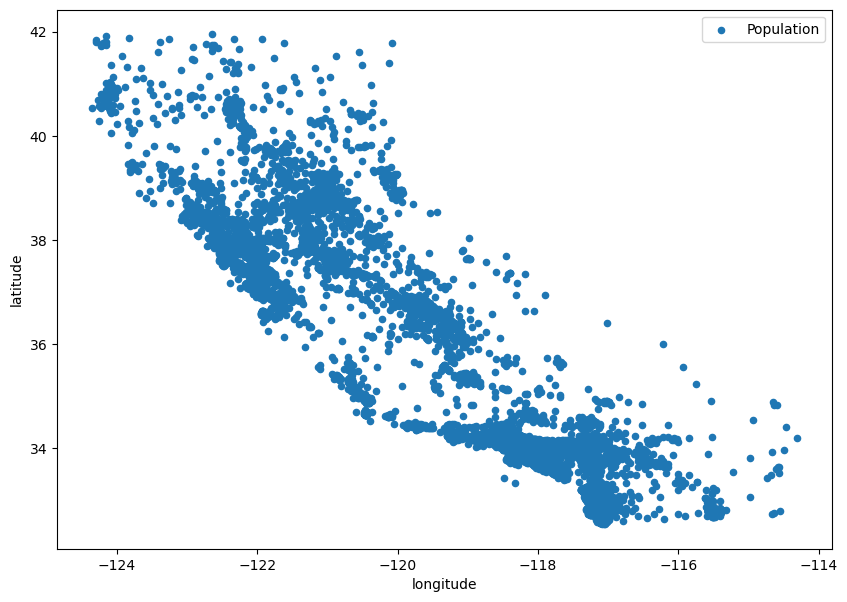

In [19]:
# Visualizing the training set to see the distribution of the data
df_train = strat_train_set.copy()
df_train.plot(
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    label = 'Population',
    figsize = (10,7),
);

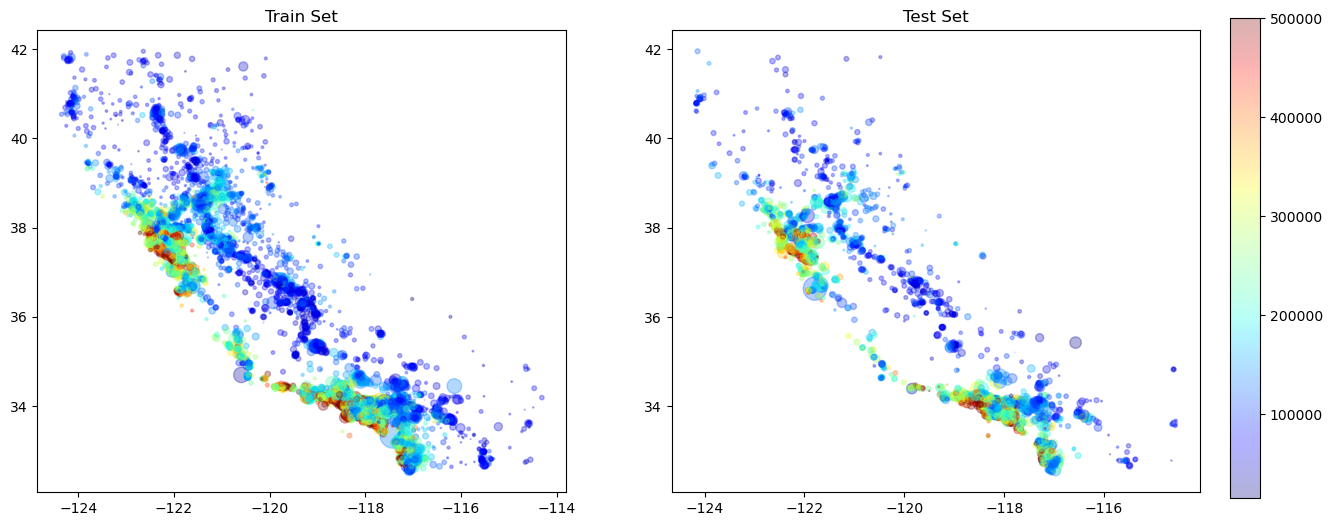

In [20]:
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (15,6)     # Setting the figure size

train_subplot = plt.subplot(1, 2, 1)    # 1 row, 2 columns, 1st plot
train_subplot.set_title("Train Set")
train_subplot.scatter(
    x = df_train["longitude"],
    y = df_train["latitude"],
    c = df_train["median_house_value"],
    s = df_train["population"]/100,
    cmap = plt.get_cmap("jet"),   # type: ignore
    alpha = 0.3,
);

test_subplot = plt.subplot(1, 2, 2)    # 1 row, 2 columns, 2nd plot
test_subplot.set_title("Test Set")
test_subplot.scatter(
    x = df_test["longitude"],
    y = df_test["latitude"],
    c = df_test["median_house_value"],
    s = df_test["population"]/100,
    cmap = plt.get_cmap("jet"),  # type: ignore
    alpha = 0.3,
);

# Creating a mappable object to add a colorbar to the plot 
cmap = mpl.cm.get_cmap("jet")   # type: ignore
norm = mpl.colors.Normalize(vmin = df["median_house_value"].min(), vmax = df["median_house_value"].max())

plt.colorbar(
    mappable = mpl.cm.ScalarMappable(norm = norm, cmap = cmap),    # type: ignore
    cax = plt.axes([0.92, 0.1, 0.02, 0.8]),     # type: ignore
    # position of the colorbar
    ax = train_subplot,
    alpha = 0.3,
);

#### From visualization of the dataset for training and testing the model, it is safe to say that both of the sets are representative and are not biased.

In [21]:
# Shortcut function to see the methods of an object.
def obj_methods(f):
    result = []
    for i in dir(f):
        if "_" not in i:
            result.append(i)
    return result

### Looking for Correlations

In [22]:
# Calculating the correlation matrix.

corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Another way to check for correlation is to use "pd.plotting.scatter_matrix" which plots every numerical attribute against every other numerical attribute.

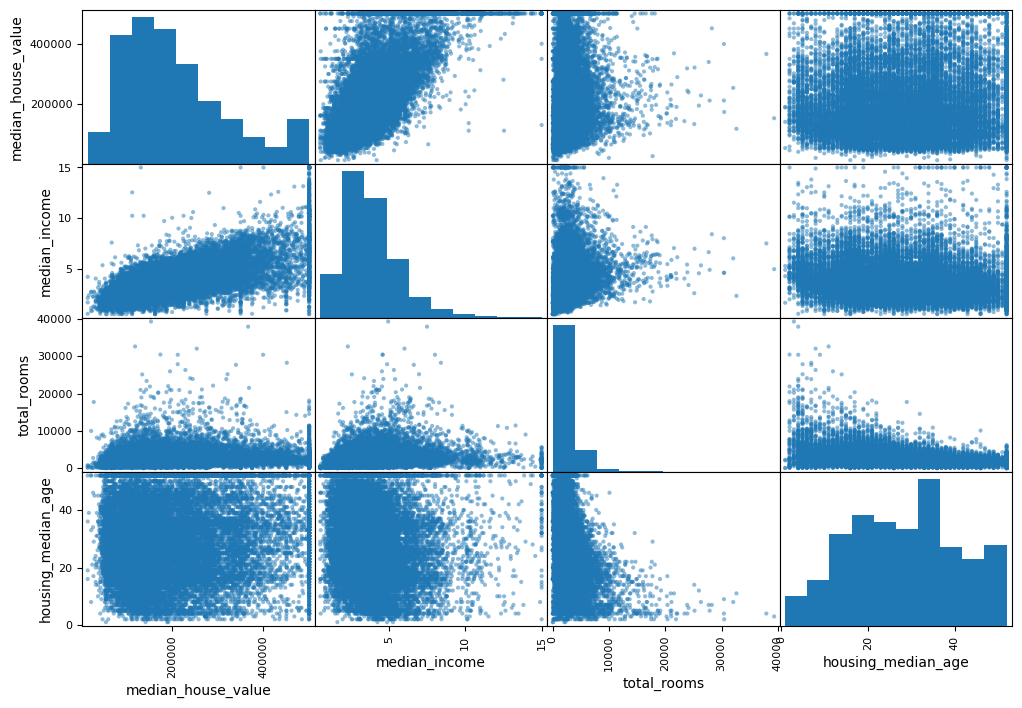

In [23]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]


pd.plotting.scatter_matrix(
    df[attributes],
    figsize = (12, 8),
    alpha = 0.5
);

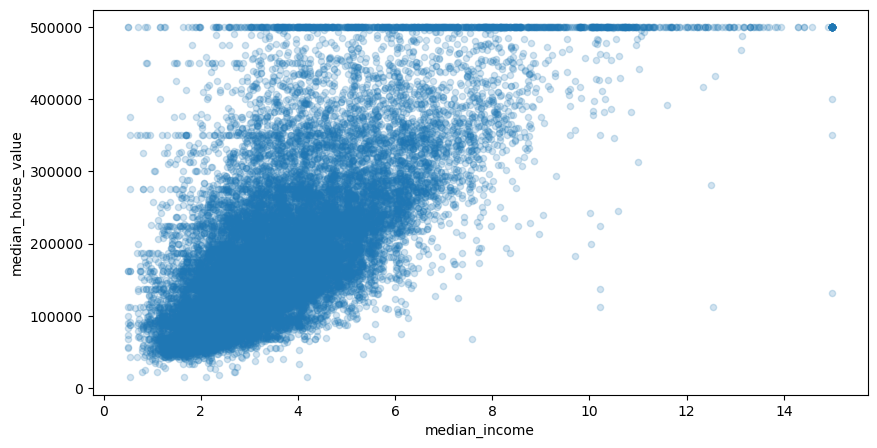

In [24]:
# Visualizing the correlation between "median_income" and "median_house_value".
df.plot(
    kind = "scatter",
    x = "median_income",
    y = "median_house_value",
    alpha = 0.2,
    figsize = (10, 5),
);

### Attribute combinations

In [25]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

In [26]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Preparing the data for Machine Learning Algorithms

In [27]:
df = strat_train_set.drop("median_house_value", axis = 1)
df_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [28]:
# Using "fillna()" method to fill the missing values in "total_bedrooms" attribute with the median of the column. 
# This helps us to retain the original data with almost the same characteristics.
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median, inplace = True)

#### We can choose to get rid of the NA values or "total_bedrooms" attribute as well. But, since we have a small dataset, these options are not preferred.

In [29]:
# Option 2: df["total_bedrooms"].dropna(subset = ["total_bedrooms"], inplace = True)
# Option 3: df.drop("total_bedrooms", axis = 1, inplace = True)

#### Scikit-Learn provides a handy class to take care of missing values: **SimpleImputer**.

In [30]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(strategy = "median")   # Creating an imputer object with the "median" strategy.
df_numerical = df.drop("ocean_proximity", axis = 1)    # Dropping the "ocean_proximity" attribute because it is a categorical attribute.
imputer.fit(df_numerical)    # Fitting the imputer object to the numerical attributes of the dataset.

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_   # The median of each attribute is stored in the "statistics_" attribute of the imputer object.

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
list(df_numerical.median().values)   # Checking if the median of each attribute is same as the median of the imputer object.

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

#### Using "imputer" object to transform the training set by replacing missing values with the median of that attribute.

In [33]:
X = imputer.transform(df_numerical)   # Transforming the dataset to a numpy array.
type(X)

numpy.ndarray

In [34]:
df_tr = pd.DataFrame(X, columns = df_numerical.columns)   # Converting the numpy array to a pandas dataframe.
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


#### Most of the ML algorithms tend to work with numbers, so we need to convert the non-numerical values into numbers.

### Handling Text and Categorical Attributes

In [35]:
df_cat = df[["ocean_proximity"]]  # Selecting the categorical attribute.
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


#### To convert the text labels into numbers, we can use Scikit-Learn's OrdinalEncoder class.

In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()   # Creating an ordinal encoder object.
type(ordinal_encoder)

sklearn.preprocessing._encoders.OrdinalEncoder

In [37]:
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]  # The categorical attribute is converted to numerical values.

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [39]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### The encoded values are not related to their distance from each other. A common solution is to create one binary attribute per category: a method called one-hot encoding.

In [40]:
# Converting the numerical values to one-hot encoded values.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()   # Creating a one-hot encoder object.
df_cat_hot_encoded = cat_encoder.fit_transform(df_cat)
df_cat_hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
df_cat_hot_encoded.toarray()[0:10]   # Converting the sparse matrix to a numpy array.

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [42]:
df_cat_hot_encoded.toarray().shape

(16512, 5)

### Using Custom Transformers

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6  # Column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):   # No *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room  # This is a hyperparameter for the class.
        
    def fit(self, X, y = None):  # This method is required by the BaseEstimator class.
        return self
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]  # Calculating the number of rooms per household.
        population_per_household = X[:, population_ix]/X[:, household_ix]   # Calculating the population per household.
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

### Transformation Pipelines

##### Sci-kit learn provides a **Pipeline** class to help with sequences of transformations.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Small pipeline for the numerical attributes.
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy = "median")),   # Filling the missing values with the median.
        ("attribs_adder", CombinedAttributesAdder()),   # Adding the new attributes.
        ("std_scaler", StandardScaler()),   # Scaling the numerical attributes.
    ]
)

df_num_tr = num_pipeline.fit_transform(df_numerical)

##### With the help of a pipeline, we can easily apply the transformations to the dataset in sequence.

In [45]:
# Using "ColumnTransformer" to apply different transformations to different columns.

from sklearn.compose import ColumnTransformer

num_attribs = list(df_numerical)    # List of numerical attributes.
cat_attribs = ["ocean_proximity"]   # List of categorical attributes.

full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, num_attribs),  # Applying the "num_pipeline" to the numerical attributes.
        ("cat", OneHotEncoder(), cat_attribs),  # Applying the "OneHotEncoder" to the categorical attributes.
    ]
)

df_prepared = full_pipeline.fit_transform(df)   # Transforming the dataset.

##### When there is such a mix of sparse and dense matrices, **ColumnTransformer** estimates "the density of the final matrix" (i.e., the ratio of non-zero cells), and it returns a **sparse matrix** if the density is lower than a given threshold (by default, sparse_threshold = 0.3).

In [46]:
print(f"Dataframe after transformation:\n\n{df_prepared}\n\nShape of the prepared dataset: {df_prepared.shape}\n\nType: {type(df_prepared)}")
# Output is a "dense matrix" (numpy array).

Dataframe after transformation:

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]

Shape of the prepared dataset: (16512, 16)

Type: <class 'numpy.ndarray'>


### Select and Train a Model

#### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()   # Creating a linear regression object.
lin_reg.fit(df_prepared, df_labels)   # Fitting the linear regression object to the dataset.


LinearRegression()

In [48]:
ex_data = df.iloc[:5]
ex_labels = df_labels.iloc[:5]
ex_data_transformed = full_pipeline.transform(ex_data)  # Transforming the first 5 rows of the dataset.

predictions = lin_reg.predict(ex_data_transformed)

In [49]:
print(f"Predictions:\n{predictions}\n\nLabels:\n{list(ex_labels)}")

Predictions:
[ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]

Labels:
[72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


##### To understand the performance of the model, we can use the **mean_squared_error( )** function.

In [53]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_reg_mse = mean_squared_error(df_labels, df_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)  # Calculating the root mean squared error.
print(f"Root-mean-Squared-Error (For a Linear Regression type model): {lin_reg_rmse}")


Root-mean-Squared-Error (For a Linear Regression type model): 68627.87390018743


##### Root Mean Square Error (RMSE) is too high for this model to be considered well-performing. This is an example of a model "underfitting" the training data.

#### Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()   # Creating a decision tree regressor object.
tree_reg.fit(df_prepared, df_labels)   # Fitting the decision tree regressor object to the dataset.

DecisionTreeRegressor()

In [55]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)  # Calculating the root mean squared error.
print(f"Root-mean-Squared-Error (For a Decision Tree type model): {tree_rmse}")

Root-mean-Squared-Error (For a Decision Tree type model): 0.0


### Better Evaluation Using Cross-Validation